In [28]:
import pandas as pd
import glob
from matplotlib import pyplot as plt
import numpy as np

In [21]:
input_dir = 'concatenated_csvs'
csv_paths = glob.glob(f'{input_dir}/*_scans.csv')
scan_16, scan_24, scan_32, scan_48, scan_64, scan_72 = [pd.read_csv(path) for path in csv_paths]
wave_no = pd.read_csv(f'{input_dir}/wave_no.csv')

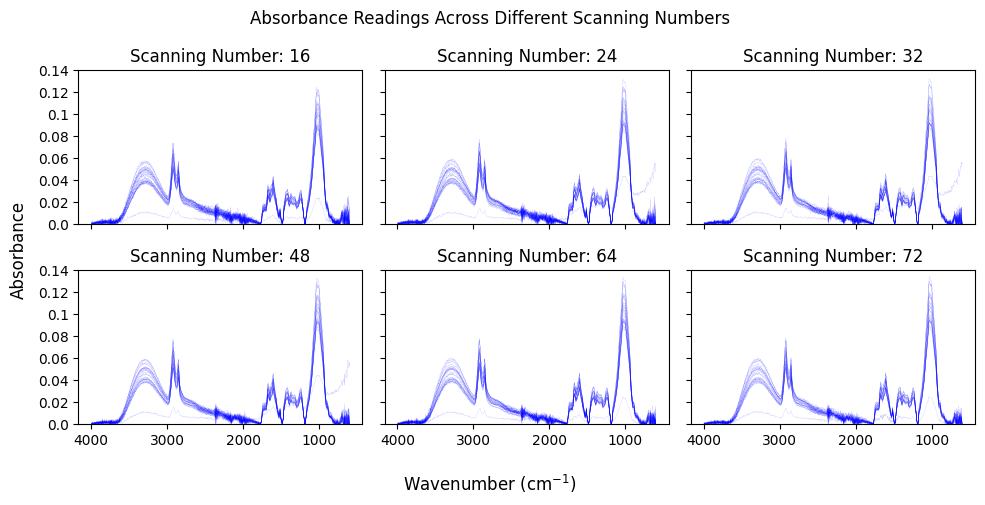

In [29]:
#Plotting All Scanning Numbers Spectra

#fig init
fig4, axes = plt.subplots(2,3, figsize=[10,5], sharex='all',sharey='all')
axes[0,0].invert_xaxis() #inverts x axis of upper right subplot which in turn inverts that of all subplots as sharex=true

fig4.canvas.header_visible = False
fig4.suptitle('Absorbance Readings Across Different Scanning Numbers')
fig4.supxlabel('Wavenumber (cm$^{-1}$)')
fig4.supylabel('Absorbance')

#organizing data

wave_no_x = wave_no
pooled_df = [scan_16, scan_24, scan_32,
             scan_48, scan_64, scan_72]
sn = [16,24,32,48,64,72]

for index, (axis, df) in enumerate(zip(axes.flat, pooled_df)):
    for trial in df.columns[1:]:
        axis.plot(wave_no_x, df[trial],
                  color='blue',
                  linewidth=0.05)
    axis.set(title=f'Scanning Number: {sn[index]}',
             yticks=[tick for tick in np.arange(0, 0.160, 0.020)],
             yticklabels=[tick for tick in np.arange(0, 0.160, 0.020)],
             ylim=[0,0.140])


fig4.tight_layout()